In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from models.logistic_regression import LogisticRegression
from helper.metrics import accuracy, confusion_matrix, precision, recall, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("datasets/car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### Data preprocessing 

In [27]:
le = LabelEncoder()
scaler = StandardScaler()

X, y = df.drop(["User ID", "Purchased"], axis=1), df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cat_col = ["Gender"]
num_col = ["Age", "AnnualSalary"]

for col in cat_col:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

for col in num_col:
    # fit only on training data
    X_train[col] = scaler.fit_transform(X_train[col].to_numpy().reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].to_numpy().reshape(-1, 1))
    
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

accuracy: 0.81
precision: 0.88
recall: 0.67
f1_score: 0.76
roc_auc_score: -0.89


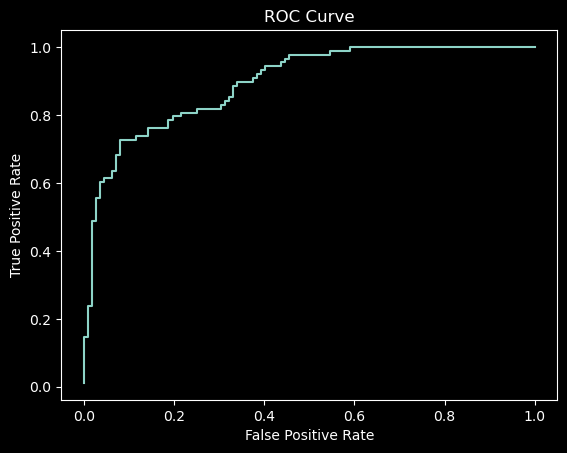

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)

print(f"accuracy: {accuracy(y_test, y_pred):.2f}")
print(f"precision: {precision(y_test, y_pred):.2f}")
print(f"recall: {recall(y_test, y_pred):.2f}")
print(f"f1_score: {f1_score(y_test, y_pred):.2f}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_probs):.2f}")
    
x, y, _ = roc_curve(y_test, y_probs)

def plot_roc_curve(x, y):
    plt.plot(x, y)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
plot_roc_curve(x, y)